In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv('C:/Users/THINKPAD L15/Desktop/PYTHON/machine learning/Data/ENB2012_data.csv')


In [4]:
print("Informations sur le dataset :")
df.info()
print("\nDimensions :", df.shape)
print("\nStatistiques descriptives :")
print(df.describe())
print("Afficher les premieres lignes ")
df.head()

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X1           768 non-null    float64
 1   X2           768 non-null    float64
 2   X3           768 non-null    float64
 3   X4           768 non-null    float64
 4   X5           768 non-null    float64
 5   X6           768 non-null    float64
 6   X7           768 non-null    float64
 7   X8           768 non-null    float64
 8   Y1           768 non-null    float64
 9   Y2           768 non-null    float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(12)
memory usage: 121.6 KB

Dimensions : (1296, 12)

Statistiques descriptives :
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167 

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [5]:
df.isna().sum()

X1              528
X2              528
X3              528
X4              528
X5              528
X6              528
X7              528
X8              528
Y1              528
Y2              528
Unnamed: 10    1296
Unnamed: 11    1296
dtype: int64

In [6]:
df = df.drop(df.columns[-2:], axis=1)


In [7]:
df.dropna(inplace=True)
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [8]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [9]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [10]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
Y1    float64
Y2    float64
dtype: object

In [11]:
df['X6'] = df['X6'].astype('category')
df['X8'] = df['X8'].astype('category')
df.dtypes

X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6    category
X7     float64
X8    category
Y1     float64
Y2     float64
dtype: object

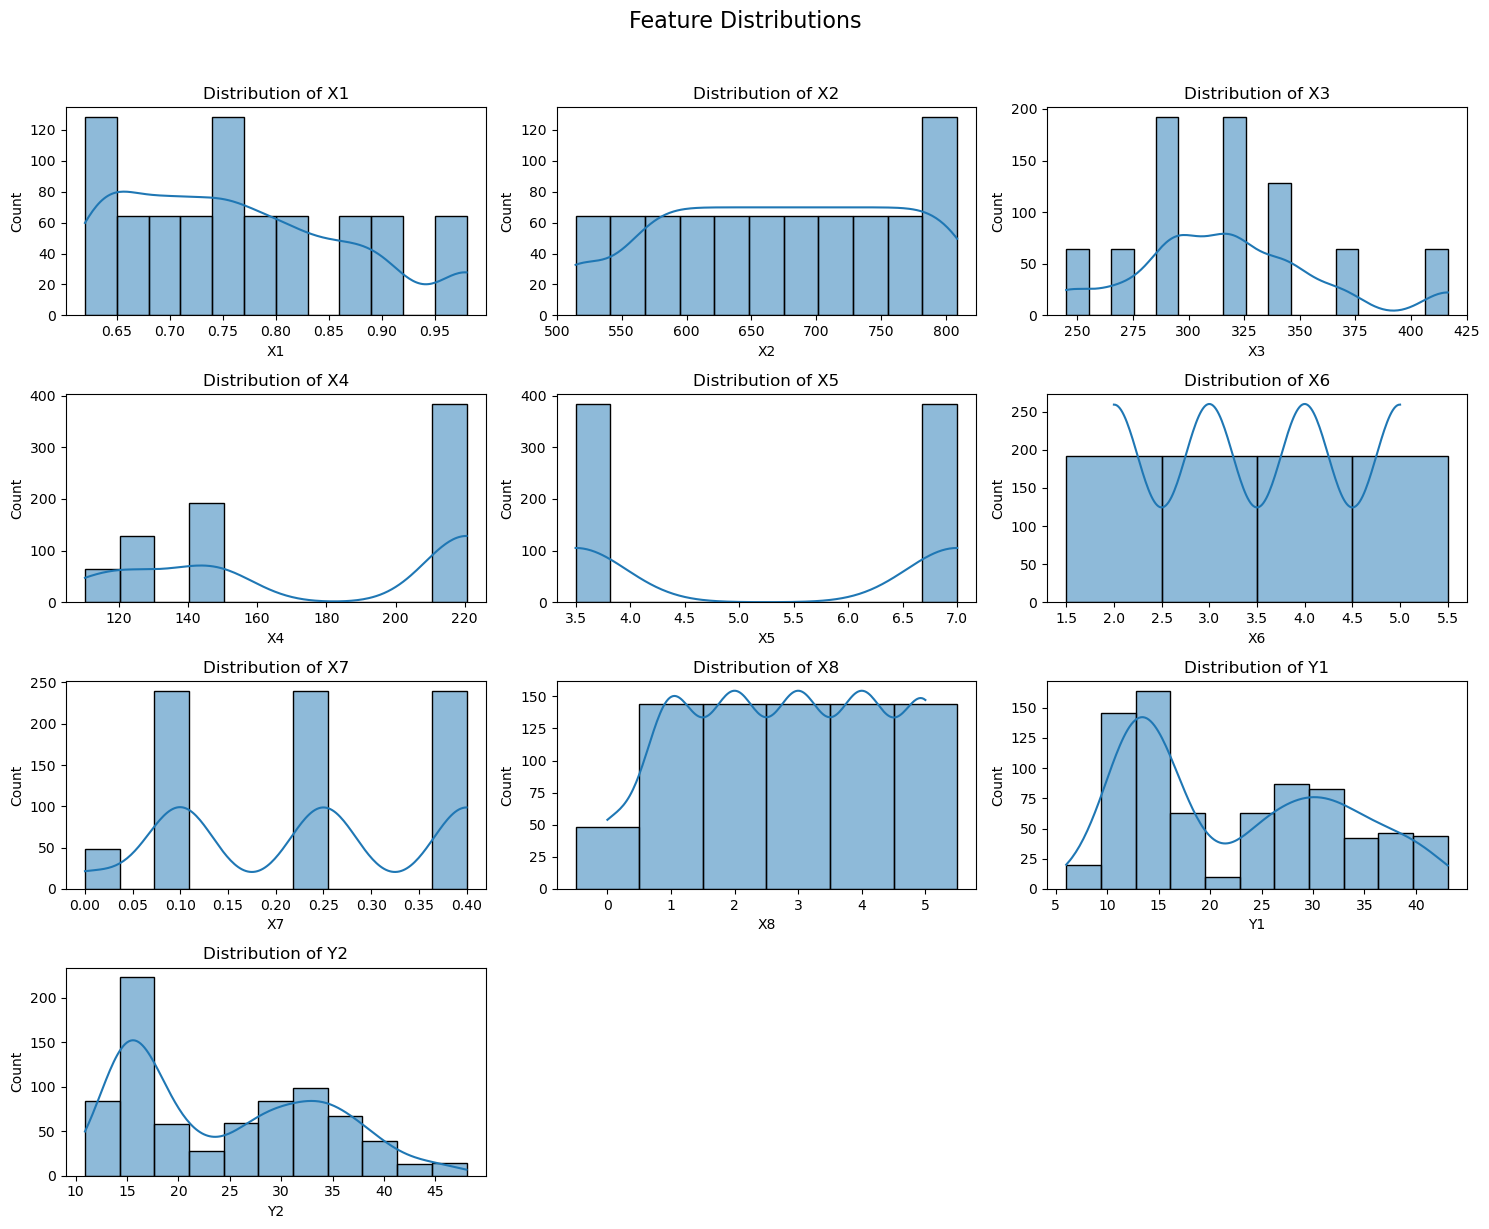

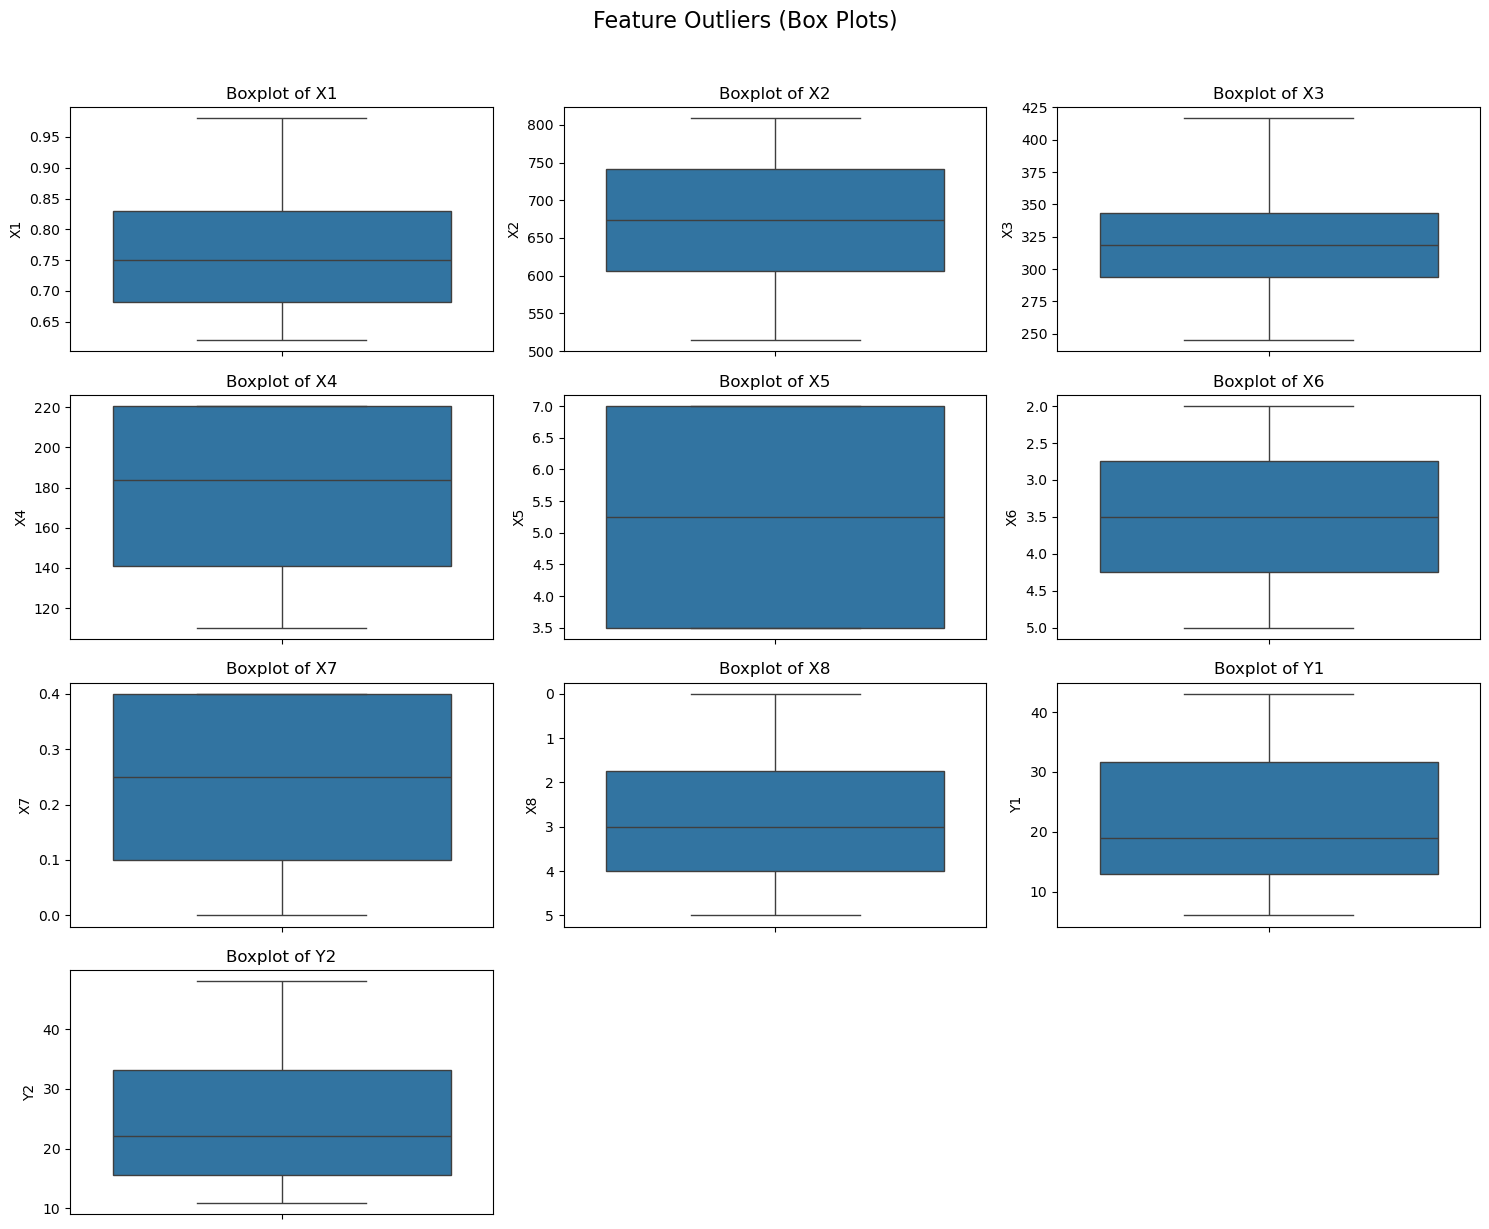

In [12]:
# histograms pour chaque caracteristique 
plt.figure(figsize=(15, 12))
plt.suptitle("Feature Distributions", y=1.02, fontsize=16)  

for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

# Box plots pour chaque caracteristique
plt.figure(figsize=(15, 12))
plt.suptitle("Feature Outliers (Box Plots)", y=1.02, fontsize=16)  

for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

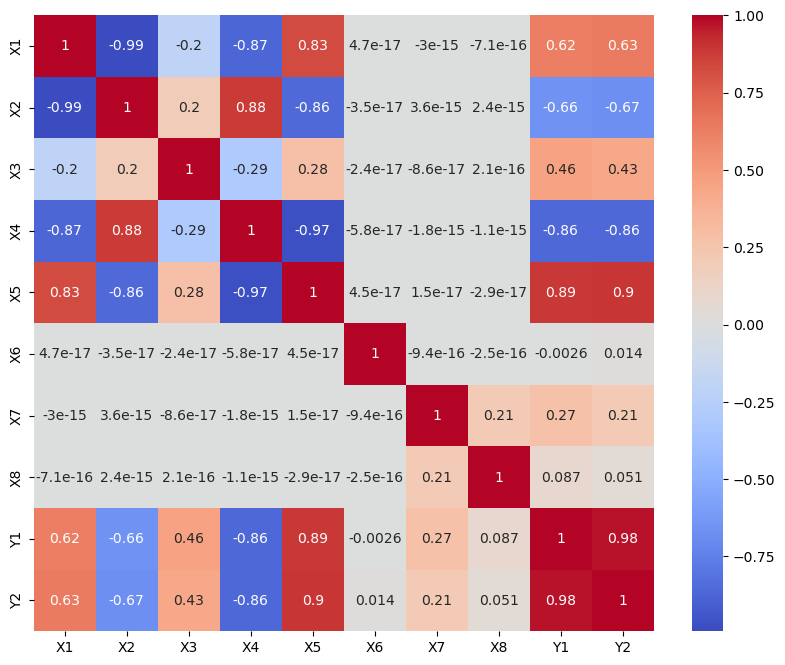

In [13]:
#matrice de correlation

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
x=df.drop(['Y1','Y2'],axis=1)
y=df[['Y1','Y2']]


In [15]:
# Standardisation 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled_df = pd.DataFrame(X_scaled, columns=x.columns)

print("\nStandardized Feature Statistics:")
print(X_scaled_df.describe().T)


Standardized Feature Statistics:
    count          mean       std       min       25%       50%       75%  \
X1  768.0 -7.401487e-17  1.000652 -1.363812 -0.772564 -0.134016  0.622781   
X2  768.0 -4.163336e-16  1.000652 -1.785875 -0.742182  0.023193  0.788568   
X3  768.0  0.000000e+00  1.000652 -1.685854 -0.561951  0.000000  0.561951   
X4  768.0  2.174187e-16  1.000652 -1.470077 -0.791580  0.158316  0.972512   
X5  768.0  0.000000e+00  1.000652 -1.000000 -1.000000  0.000000  1.000000   
X6  768.0  0.000000e+00  1.000652 -1.341641 -0.670820  0.000000  0.670820   
X7  768.0  1.480297e-16  1.000652 -1.760447 -1.009323  0.117363  1.244049   
X8  768.0  0.000000e+00  1.000652 -1.814575 -0.685506  0.120972  0.766154   

         max  
X1  2.041777  
X2  1.553943  
X3  2.247806  
X4  0.972512  
X5  1.000000  
X6  1.341641  
X7  1.244049  
X8  1.411336  


In [16]:
df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

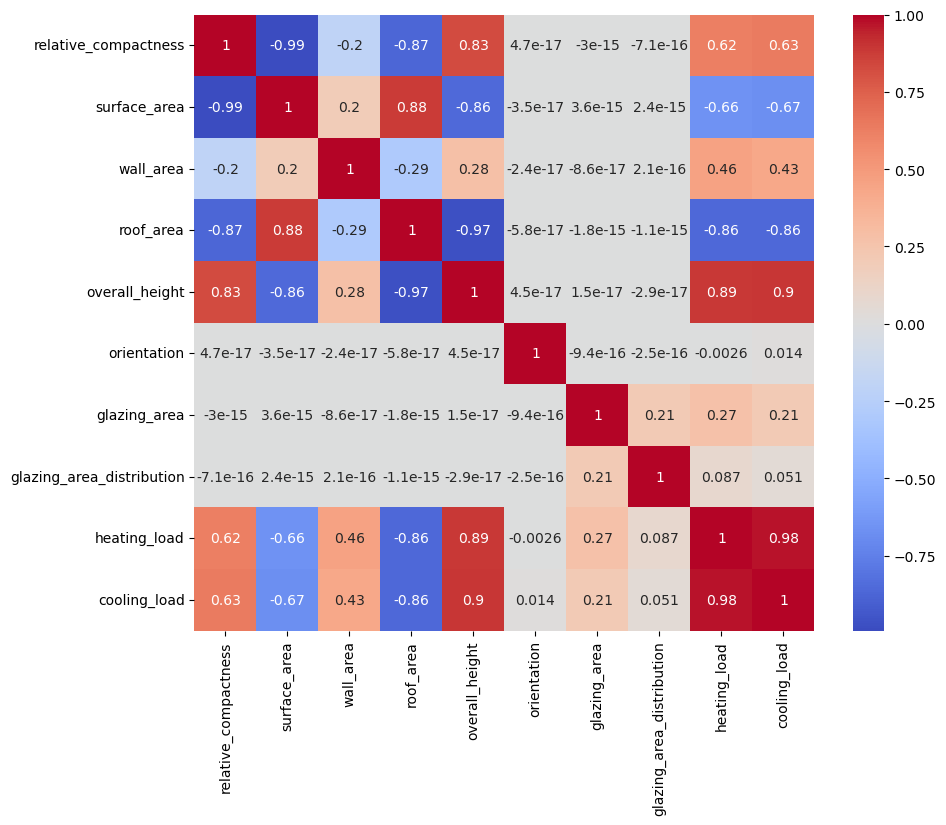

In [17]:
#matrice de correlation

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
X = df.drop(columns=['heating_load', 'cooling_load'], axis=1)
Y=df[['heating_load', 'cooling_load']]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size=0.20, random_state=42)

print(f"Taille de l'ensemble d'entraînement (80%): {len(X_train)} observations")
print(f"Taille de l'ensemble de test (20%): {len(X_test)} observations")

Taille de l'ensemble d'entraînement (80%): 614 observations
Taille de l'ensemble de test (20%): 154 observations


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

# 4. ÉVALUATION DU MODÈLE
# ==============================================================================
# Prédiction sur l'ensemble de test
Y_pred = model.predict(X_test)

# Métriques d'évaluation
mse_heating = mean_squared_error(Y_test['heating_load'], Y_pred[:, 0])
mse_cooling = mean_squared_error(Y_test['cooling_load'], Y_pred[:, 1])

r2_heating = r2_score(Y_test['heating_load'], Y_pred[:, 0])
r2_cooling = r2_score(Y_test['cooling_load'], Y_pred[:, 1])


print("\n--- Évaluation du Modèle ---")
print(f"Heating Load → MSE: {mse_heating:.2f} | R²: {r2_heating:.3f}")
print(f"Cooling Load → MSE: {mse_cooling:.2f} | R²: {r2_cooling:.3f}")


--- Évaluation du Modèle ---
Heating Load → MSE: 9.16 | R²: 0.912
Cooling Load → MSE: 9.88 | R²: 0.893


In [21]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')

print(f"R² moyen (5-fold CV): {np.mean(scores):.3f} ± {np.std(scores):.3f}")


R² moyen (5-fold CV): 0.900 ± 0.006


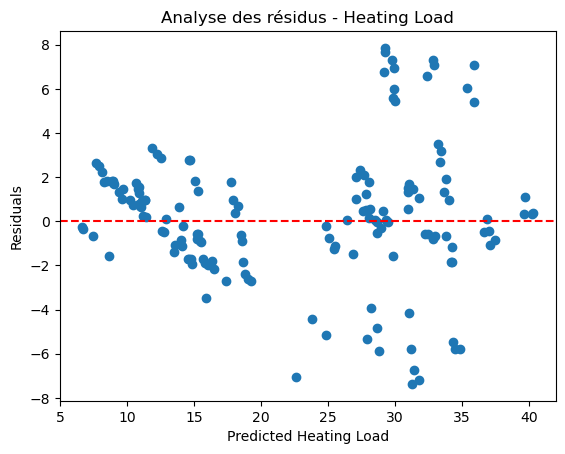

In [22]:
import matplotlib.pyplot as plt

# Résidus pour Heating Load
residuals = Y_test['heating_load'] - Y_pred[:, 0]

plt.scatter(Y_pred[:, 0], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Heating Load")
plt.ylabel("Residuals")
plt.title("Analyse des résidus - Heating Load")
plt.show()


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1️⃣ Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2️⃣ Modèle régularisé
gb_model = MultiOutputRegressor(GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,   # bagging partiel → réduit l’overfit
    random_state=42
))

# 3️⃣ Entraînement
gb_model.fit(X_train, Y_train)

# 4️⃣ Évaluation
Y_pred = gb_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"📊 R² (test): {r2:.3f} | MSE: {mse:.3f}")

# 5️⃣ Validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(gb_model.estimator, X, Y, cv=cv, scoring='r2')
print(f"R² moyen (5-fold): {np.mean(scores):.3f} ± {np.std(scores):.3f}")

📊 R² (test): 0.994 | MSE: 0.565


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\THINKPAD L15\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\THINKPAD L15\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\THINKPAD L15\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 668, in fit
    y = column_or_1d(y, warn=True)  # TODO: Is this still required?
        ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\THINKPAD L15\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1406, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (614, 2) instead.

--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\THINKPAD L15\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\THINKPAD L15\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\THINKPAD L15\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 668, in fit
    y = column_or_1d(y, warn=True)  # TODO: Is this still required?
        ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\THINKPAD L15\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1406, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (615, 2) instead.
